## 라이브러리 로딩

In [270]:
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

## 데이터 로딩 및 확인

In [271]:
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

In [272]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [273]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [274]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


- id 고유 id
- hour 시간
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수 (label)

In [275]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [276]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


## 결측치 확인 및 처리 + 데이터 전처리

In [277]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [278]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

ozone, pm에 결측 자료가 많다.

precipitation에서는 평균 값으로 대체하면 안된다.

In [279]:
#na 값을 시간별 평균으로 넣어주자.


def fill_na(df,column):
    print('column : ',column)
    hour_mean = train.groupby('hour').mean()[column]
    
    na_index_list = list( df[df[column].isnull()].index ) #na 인덱스를 받아서.
    
    for ind in na_index_list:
        df.loc[ind,column] = hour_mean[train.loc[ind,'hour']]
        if np.isnan( hour_mean[train.loc[ind,'hour']] ):
            df.loc[ind,column] = train[column].mean()
            #왜냐면, 진짜 그시간대는 모두 na인 경우가 있다. 그때는 전체 평균
             
fill_na(train,'hour_bef_temperature')
fill_na(test,'hour_bef_temperature')

fill_na(train,'hour_bef_windspeed')
fill_na(test,'hour_bef_windspeed')

fill_na(train,'hour_bef_humidity')
fill_na(test,'hour_bef_humidity')

fill_na(train,'hour_bef_visibility')
fill_na(test,'hour_bef_visibility')

fill_na(train,'hour_bef_ozone')
fill_na(test,'hour_bef_ozone')

fill_na(train,'hour_bef_pm10')
fill_na(test,'hour_bef_pm10')

fill_na(train,'hour_bef_pm2.5')
fill_na(test,'hour_bef_pm2.5')


#나머지 데이터 0으로 채우기
train.fillna(0,inplace = True)
test.fillna(0,inplace = True)




column :  hour_bef_temperature
column :  hour_bef_temperature
column :  hour_bef_windspeed
column :  hour_bef_windspeed
column :  hour_bef_humidity
column :  hour_bef_humidity
column :  hour_bef_visibility
column :  hour_bef_visibility
column :  hour_bef_ozone
column :  hour_bef_ozone
column :  hour_bef_pm10
column :  hour_bef_pm10
column :  hour_bef_pm2.5
column :  hour_bef_pm2.5


In [281]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [282]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [283]:
#id 컬럼 드랍
train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)


In [177]:
# work, leave 변수 추가. (feature engineering)


#새로운 변수 추가
train['work'] = 0

train.loc[(train['hour'] ==8 ) | (train['hour'] == 18), 'work'] = 1

#test에도 추가.
test['work'] = 0

test.loc[(test['hour'] ==8 ) | (test['hour'] == 18), 'work'] = 1





In [284]:
train

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [285]:
# hour 데이터 circular 변환

train['hour_sin'] = np.sin(2 * np.pi * train['hour']/24.0)
train['hour_cos'] = np.cos(2 * np.pi * train['hour']/24.0)
train.drop(['hour'],axis=1,inplace=True)


test['hour_sin'] = np.sin(2 * np.pi * test['hour']/24.0)
test['hour_cos'] = np.cos(2 * np.pi * test['hour']/24.0)
test.drop(['hour'],axis=1,inplace=True)



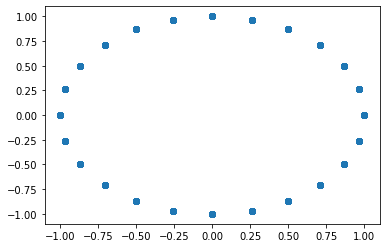

In [286]:
plt.scatter(train['hour_cos'],train['hour_sin'])

In [287]:
#타입 변환
train['count'] = train['count'].astype('int64')
train['hour_bef_precipitation'] = train['hour_bef_precipitation'].astype('category')

#test['count'] = test['count'].astype('int64')
test['hour_bef_precipitation'] = test['hour_bef_precipitation'].astype('category')


In [288]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   hour_bef_temperature    1459 non-null   float64 
 1   hour_bef_precipitation  1459 non-null   category
 2   hour_bef_windspeed      1459 non-null   float64 
 3   hour_bef_humidity       1459 non-null   float64 
 4   hour_bef_visibility     1459 non-null   float64 
 5   hour_bef_ozone          1459 non-null   float64 
 6   hour_bef_pm10           1459 non-null   float64 
 7   hour_bef_pm2.5          1459 non-null   float64 
 8   count                   1459 non-null   int64   
 9   hour_sin                1459 non-null   float64 
 10  hour_cos                1459 non-null   float64 
dtypes: category(1), float64(9), int64(1)
memory usage: 115.7 KB


## 모델 정의 및 학습

In [289]:
# train 데이터에서 라벨 제거
train_x = train.drop(['count'],axis = 1)
train_y = train['count']

In [65]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV



#http://aispiration.com/model/model-python-cross-validation.html

#param list라는 dictionary에 담아두면, 함수를 통해 RandomizedSearchCV가 여기서 랜덤하게 뽑아준다.

#여기서 파라미터는 생각대로 설정.
param_list = {"n_estimators": list(range(10, 1000, 10)), # 나무의 수
               "max_depth": list(range(1, 10, 1)) } # 

rf = RandomForestRegressor(oob_score=True, random_state=1234)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 100,
        cv = 5,
        n_jobs=-1, # 가능한 모든 자원을 쓴다는 뜻.
        scoring = 'neg_root_mean_squared_error',
        verbose=2)

# neg_root_mean_squared_error : 오차가 올라가면 나쁘다는 의미.

rf_random_search.fit(train_x, train_y)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [148]:
#loss가 0에 가까울 수록 좋은것.
pd.DataFrame(rf_random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.701082,0.094029,0.253588,0.006644,1760,44,"{'n_estimators': 1760, 'max_depth': 44}",-37.921781,-41.405824,-36.433975,-38.584339,-36.396269,-38.148438,1.836378,15
1,7.170010,0.135359,0.161444,0.005904,1170,19,"{'n_estimators': 1170, 'max_depth': 19}",-37.934077,-41.463581,-36.329547,-38.551554,-36.502805,-38.156313,1.855521,27
2,11.008337,0.088438,0.251609,0.010695,1760,30,"{'n_estimators': 1760, 'max_depth': 30}",-37.921781,-41.405824,-36.433975,-38.583975,-36.396269,-38.148365,1.836361,14
3,6.810632,0.084467,0.156655,0.016210,1080,25,"{'n_estimators': 1080, 'max_depth': 25}",-37.956711,-41.460688,-36.343391,-38.530227,-36.559488,-38.170101,1.840333,37
4,8.301470,0.178041,0.184800,0.007782,1240,45,"{'n_estimators': 1240, 'max_depth': 45}",-37.938345,-41.421500,-36.331866,-38.565019,-36.558275,-38.163001,1.830743,31
5,11.373928,0.279881,0.264399,0.013230,1680,43,"{'n_estimators': 1680, 'max_depth': 43}",-37.903520,-41.422169,-36.410149,-38.574206,-36.412541,-38.144517,1.843556,10
6,6.251515,0.201641,0.147199,0.008158,930,33,"{'n_estimators': 930, 'max_depth': 33}",-38.020669,-41.517016,-36.353196,-38.498785,-36.539014,-38.185736,1.859708,46
7,8.012243,0.226915,0.179320,0.007107,1070,18,"{'n_estimators': 1070, 'max_depth': 18}",-37.963557,-41.500884,-36.351100,-38.520676,-36.544906,-38.176225,1.855237,43
8,9.804022,0.216871,0.206476,0.033918,1130,36,"{'n_estimators': 1130, 'max_depth': 36}",-37.957580,-41.457689,-36.341255,-38.562532,-36.533795,-38.170570,1.845512,39
9,9.998347,0.519415,0.235161,0.040537,1230,25,"{'n_estimators': 1230, 'max_depth': 25}",-37.929672,-41.426344,-36.341379,-38.568982,-36.565342,-38.166344,1.829723,36


In [179]:
rf_random_search.best_params_    # 최상의 매개변수를 추출

#estimator와 max_depth가 깊을수록 좋아보인다. 더 깊게 해보자.

# 시도 1
# param_list = {"n_estimators": list(range(10, 1000, 10)), # 나무의 수
#               "max_depth": list(range(1, 10, 1)) } # 
# 45.3

# 시도 2



{'n_estimators': 1610, 'max_depth': 41}

In [180]:
# best parameter와 결과
best_params = rf_random_search.best_params_    # 최상의 매개변수를 추출
print("최상의 매개변수:", best_params) # 최상의 매개변수를 출력
best_score = -rf_random_search.best_score_ # 최상의 점수를 계산
print("훈련 점수: {:.3f}".format(best_score))  # 최상의 점수를 출력

#y_pred = rf_random_search.predict(test)# 테스트 세트에 대한 예측


# rmse loss가 38.675로, test set보단 낮게 나왔다.


최상의 매개변수: {'n_estimators': 1610, 'max_depth': 41}
훈련 점수: 38.131


In [182]:
model=RandomForestRegressor(n_estimators=100,
                            max_depth=41
                           )
model.fit(train_x,train_y)

RandomForestRegressor(max_depth=41, n_estimators=1610)

In [290]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

## 학습 된 모델로 예측 데이터 생성

In [291]:
pred = model.predict(test)

## 제출파일 생성

In [292]:
submission = pd.read_csv('./data/submission.csv')
submission

,id,count
0,0,0
1,1,0
2,2,0
3,4,0
4,5,0
...,...,...
710,2148,0
711,2149,0
712,2165,0
713,2166,0


In [293]:
#pred = np.ceil(pred)

In [294]:
submission['count'] = pred

In [295]:
submission

,id,count
0,0,84.09
1,1,204.63
2,2,107.42
3,4,29.52
4,5,53.07
...,...,...
710,2148,61.31
711,2149,67.77
712,2165,121.91
713,2166,174.28


In [296]:
submission.to_csv('베이스라인.csv',index = False)

# 베이스라인 코드를 보면서 생각한 것


1. RandomForest 하이퍼 파라미터 서치를 해보자.
2. 결측치를 다 0으로 채워주면 될까? 그 시간대 별 평균을 넣을까? 
3. 시간 변수가 1~24로 되있는데, circular하게 바꾸면 어떨까? V
4. 시간대별 분포를 보고, 변수를 추가해볼까? V
5. 수치형 변수들이 많으니 xgboost를 이용해볼까.
6. 해당 데이터의 계절을 알 방법이 없을까? 계절에 따라 탑승량이 다를까?
7. 당연히 id 컬럼은 빼야지 V
8. 예측했더니 소수점이 발생한다. 정수형을 예측해야하니 버림 하자. V

추가 아이디어를 EDA를 통해 확인해보자!
